In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df=pd.read_csv(r"D:\BACKUP\PYTHON CLASS\wine_data.csv")

In [3]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='str')

In [4]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [5]:
df.shape

(1599, 12)

In [6]:
df["quality"].mode()

0    5
Name: quality, dtype: int64

In [7]:
df["quality"].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

In [8]:
c=0
for q in df["quality"]:
  if q==5:
   c+=1
print(c)

681


In [9]:
df.describe()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


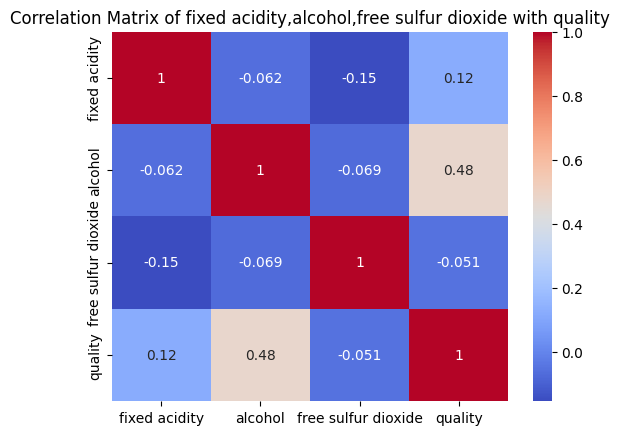

In [10]:
corr_matrix=df[["fixed acidity","alcohol","free sulfur dioxide","quality"]].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of fixed acidity,alcohol,free sulfur dioxide with quality')
plt.show()

In [11]:
Avg_1=df[df["quality"]==8]["residual sugar"].mean()
print(Avg_1)

2.5777777777777775


In [12]:
Avg_2=df[df["quality"]==3]["residual sugar"].mean()
print(Avg_2)

2.6350000000000002


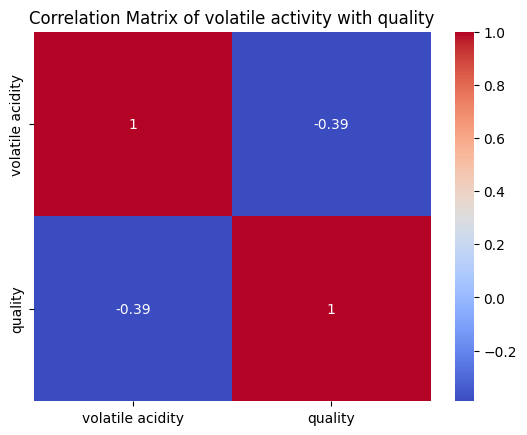

In [13]:
corr_matrix=df[["volatile acidity","quality"]].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of volatile activity with quality')
plt.show()

In [14]:
#%%
x=df.iloc[:,0:10]
y=df.iloc[:,-1]
print(x)
print(y)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [16]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(n_estimators=100,random_state=42)
classifier.fit(x_train,y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

In [17]:
y_pred_randFor=classifier.predict(x_test)
print(np.concatenate((y_pred_randFor.reshape(len(y_pred_randFor),1),y_test.to_numpy().reshape(len(y_test),1)),1))

[[5 6]
 [5 5]
 [5 6]
 [5 5]
 [6 6]
 [5 5]
 [5 5]
 [5 5]
 [7 5]
 [6 6]
 [7 7]
 [5 3]
 [6 5]
 [5 5]
 [6 6]
 [6 7]
 [6 5]
 [6 7]
 [7 8]
 [5 5]
 [5 5]
 [6 6]
 [5 5]
 [6 6]
 [6 6]
 [6 6]
 [6 7]
 [5 6]
 [5 5]
 [6 6]
 [5 5]
 [6 5]
 [6 6]
 [6 5]
 [6 6]
 [5 5]
 [6 7]
 [6 5]
 [5 4]
 [6 6]
 [5 5]
 [5 5]
 [6 7]
 [5 5]
 [6 5]
 [6 6]
 [6 7]
 [6 6]
 [5 5]
 [6 6]
 [5 5]
 [5 5]
 [6 5]
 [7 7]
 [5 6]
 [6 6]
 [6 6]
 [6 5]
 [6 5]
 [5 5]
 [6 5]
 [6 7]
 [6 5]
 [6 6]
 [7 6]
 [6 5]
 [6 6]
 [6 5]
 [7 6]
 [6 5]
 [6 6]
 [6 4]
 [6 6]
 [6 6]
 [6 6]
 [5 5]
 [7 8]
 [5 5]
 [6 6]
 [6 6]
 [5 5]
 [6 6]
 [5 5]
 [6 6]
 [6 6]
 [6 7]
 [5 5]
 [6 6]
 [6 7]
 [5 4]
 [6 7]
 [5 6]
 [5 5]
 [5 5]
 [6 5]
 [6 6]
 [5 5]
 [6 6]
 [5 5]
 [5 6]
 [5 5]
 [5 5]
 [6 5]
 [7 7]
 [6 6]
 [7 7]
 [6 6]
 [5 5]
 [6 6]
 [5 5]
 [7 8]
 [5 5]
 [7 6]
 [5 5]
 [5 6]
 [6 7]
 [6 6]
 [5 6]
 [5 5]
 [5 6]
 [6 6]
 [6 6]
 [6 6]
 [5 6]
 [6 6]
 [5 6]
 [6 7]
 [5 6]
 [5 5]
 [6 5]
 [6 6]
 [5 5]
 [5 5]
 [6 5]
 [6 6]
 [5 5]
 [5 5]
 [5 5]
 [5 5]
 [6 6]
 [7 7]
 [6 6]
 [7 8]

In [18]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm_1=confusion_matrix(y_test,y_pred_randFor)
print(cm_1)
accuracy_score(y_test,y_pred_randFor)

[[ 0  0  1  0  0  0]
 [ 0  0  5  5  0  0]
 [ 0  0 91 37  2  0]
 [ 0  0 35 91  5  1]
 [ 0  0  0 23 18  1]
 [ 0  0  0  1  4  0]]


0.625

In [21]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred_randFor)



0.625

In [27]:
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

# Example: Load dataset (change file name if needed)
# data = pd.read_csv("data.csv")

# For demo purpose (using sklearn dataset)
from sklearn.datasets import load_iris
data = load_iris()

X = data.data
y = data.target

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# -------------------- Decision Tree --------------------
DecTree = DecisionTreeClassifier()
DecTree.fit(X_train, y_train)

y_pred_DecTree = DecTree.predict(X_test)

# Confusion Matrix & Accuracy for Decision Tree
cm_dt = confusion_matrix(y_test, y_pred_DecTree)
print("Decision Tree Confusion Matrix:\n", cm_dt)

acc_dt = accuracy_score(y_test, y_pred_DecTree)
print("Decision Tree Accuracy:", acc_dt)


# -------------------- Random Forest --------------------
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_pred_randFor = rf.predict(X_test)

# Confusion Matrix & Accuracy for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_randFor)
print("\nRandom Forest Confusion Matrix:\n", cm_rf)

acc_rf = accuracy_score(y_test, y_pred_randFor)
print("Random Forest Accuracy:", acc_rf)


Decision Tree Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Decision Tree Accuracy: 1.0

Random Forest Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Random Forest Accuracy: 1.0


In [28]:
#%%
cm_2=confusion_matrix(y_test,y_pred_randFor)
print(cm_2)
accuracy_score(y_test,y_pred_DecTree)

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


1.0